In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
def plot_plane(plane_point, plane_normal):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    d = -np.dot(plane_point, plane_normal)
    xx, yy = np.meshgrid(range(-10, 11), range(-10, 11))
    zz = (-plane_normal[0] * xx - plane_normal[1] * yy - d) * 1. / plane_normal[2]
    ax.plot_surface(xx, yy, zz, alpha=0.5)

    # Plot the point on the plane
    ax.scatter(point_on_plane[0], point_on_plane[1], point_on_plane[2], color='r', label='Point on Plane')

    # Set labels and legend
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

    # Show the plot
    plt.show()

In [118]:
def project_onto_plane(points, plane_normal, point_on_plane):
    normal_unit = plane_normal / np.linalg.norm(plane_normal)
    projection_matrix = np.eye(3) - np.outer(normal_unit, normal_unit)

    vectors_to_points = points - point_on_plane

    projected_vectors = np.dot(vectors_to_points, projection_matrix)

    projected_points = point_on_plane + projected_vectors

    return projected_points

In [119]:
def plot_3d_and_2d_projection(coordinates, plane_normal, plane_point):
    # Drawing 3D plot
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.set_title('3D Coordinates')
    ax1.scatter(coordinates[:, 0], coordinates[:, 1], coordinates[:, 2], c='b', marker='.')

    # Get 2D projection
    coordinates_2d = project_onto_plane(coordinates, plane_normal, plane_point)

    # Drawing 2D projection
    ax2 = fig.add_subplot(122)
    ax2.set_title('2D Projection')
    ax2.scatter(coordinates_2d[:, 0], coordinates_2d[:, 1], c='r', marker='.')

    plt.show()

In [120]:
# Setting the parameters
path_to_file = "data/pc_bcc.csv"
point_on_plane = np.array([1, 2, 3])
plane_normal = np.array([1, 2, 5])
grid_number = 0

In [121]:
df = pd.read_csv(path_to_file, names=["id", "x", "y", "z"], skiprows=1)
df.drop(["id"], axis=1, inplace=True)
grids = np.array_split(df, 50)
grids[0].shape

(559, 3)

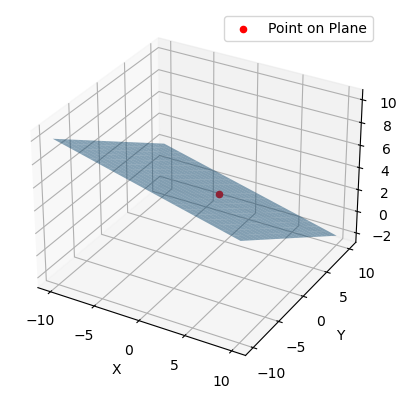

In [122]:
plot_plane(point_on_plane, plane_normal)

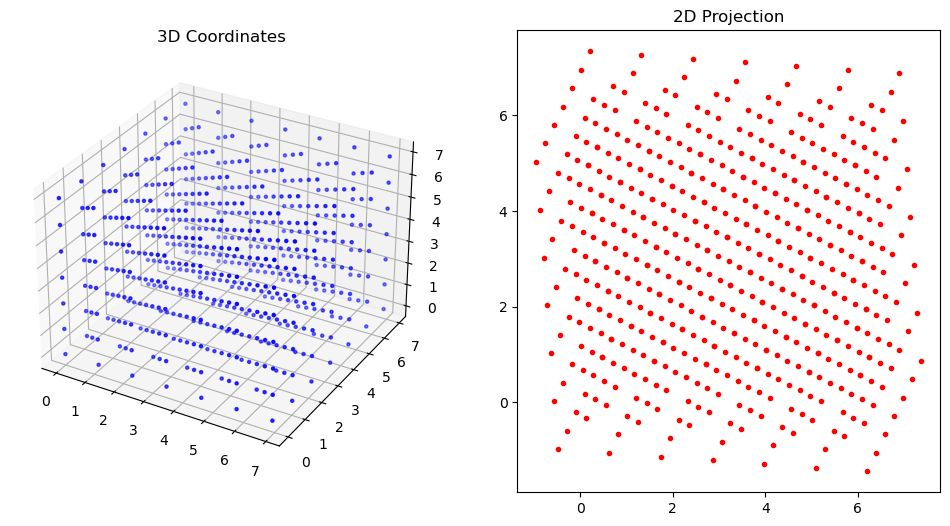

In [123]:
plot_3d_and_2d_projection(grids[grid_number].to_numpy(), plane_normal, point_on_plane)